# Mathematical Modeling of Infectious Disease Spread
### Using the SIR Model and Numerical Simulation

**Author:** Misgana(Proall22)  
**Background:** Software Engineering Graduate  
**Tools:** Python, NumPy, SciPy, Matplotlib  

---

## Introduction

Mathematical models play a crucial role in understanding how infectious diseases spread in a population.
In this project, we study the classical **SIR model**, which divides the population into:

- **S**: Susceptible individuals  
- **I**: Infected individuals  
- **R**: Recovered individuals  

We simulate the model numerically and analyze how changes in parameters affect disease dynamics.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


## The SIR Mathematical Model

The SIR model is defined by the following system of differential equations:

\[
\frac{dS}{dt} = -\beta SI
\]
\[
\frac{dI}{dt} = \beta SI - \gamma I
\]
\[
\frac{dR}{dt} = \gamma I
\]

Where:
- \( \beta \): infection rate
- \( \gamma \): recovery rate
- \( S(t), I(t), R(t) \): population proportions

### Assumptions:
- Fixed population
- Homogeneous mixing
- Recovered individuals gain immunity


In [3]:
def sir_model(y, t, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]


## Initial Conditions and Parameters


In [4]:
S0 = 0.99   # 99% susceptible
I0 = 0.01   # 1% infected
R0 = 0.0    # 0% recovered

beta = 0.3   # infection rate
gamma = 0.1  # recovery rate

t = np.linspace(0, 160, 160)


In [5]:
solution = odeint(sir_model, [S0, I0, R0], t, args=(beta, gamma))
S, I, R = solution.T


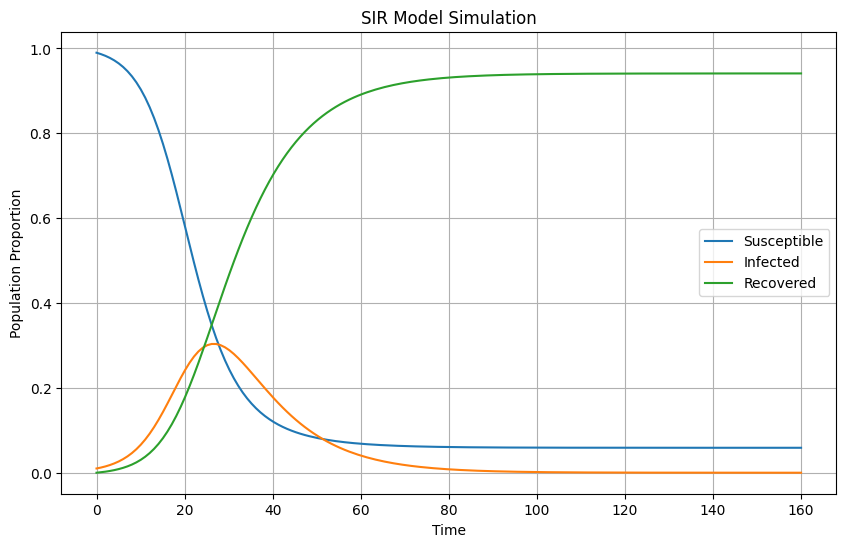

In [6]:
plt.figure(figsize=(10,6))
plt.plot(t, S, label='Susceptible')
plt.plot(t, I, label='Infected')
plt.plot(t, R, label='Recovered')
plt.xlabel('Time')
plt.ylabel('Population Proportion')
plt.title('SIR Model Simulation')
plt.legend()
plt.grid()
plt.show()


## Interpretation of Results

- The infected population rises rapidly, reaches a peak, then declines.
- Susceptible individuals decrease as they become infected.
- Recovered individuals increase steadily.

This behavior is consistent with real-world epidemic dynamics.


## Modeling a Lockdown Intervention

A lockdown reduces the infection rate \( \beta \).


In [7]:
beta_lockdown = 0.1

solution_lockdown = odeint(
    sir_model, [S0, I0, R0], t, args=(beta_lockdown, gamma)
)

S_l, I_l, R_l = solution_lockdown.T


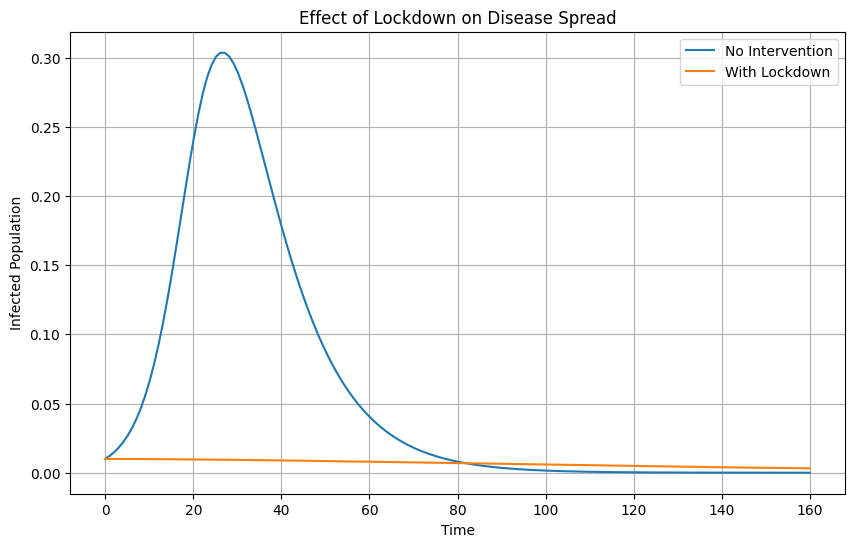

In [8]:
plt.figure(figsize=(10,6))
plt.plot(t, I, label='No Intervention')
plt.plot(t, I_l, label='With Lockdown')
plt.xlabel('Time')
plt.ylabel('Infected Population')
plt.title('Effect of Lockdown on Disease Spread')
plt.legend()
plt.grid()
plt.show()


## Discussion

Reducing the infection rate significantly lowers:
- Peak infection
- Speed of spread

This demonstrates how mathematical models can inform public health policies.


## Limitations
- No age structure
- No spatial effects
- Assumes perfect immunity

## Future Extensions
- SEIR model
- Vaccination modeling
- Real-world data fitting
